# Применение логистической регрессии для решения задачи классификации

# Описание набора данных

Данный набор содержит информацию о пассажирах корабля «Титаник», затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д.

Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы — отдельный пассажир, вся информация о нем содержится в его строке.

Описание датасета:
- **Survived** (целевой признак): выжил ли пассажир (0 = Нет, 1 = Да);
- **Pclass**: класс каюты (1 = 1st, 2 = 2nd, 3 = 3rd);
- **Sex**: пол (female или male)
- **Age**: возраст в годах
- **SibSp**: количество братьев, сестёр (в том числе сводных) и супругов на борту
- **Parch**: количество детей и родителей на борту
- **Ticket**: номер билета
- **Fare**: стоимость проезда пассажира
- **Cabin**: номер каюты
- **Embarked**: порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = Southampton).

Необходимо решить задачу классификации и научиться предсказывать целовой признак **Survived** — выживет ли пассажир — по соответсвующим ему нецелевым признакам.


# Подготовка и первичный анализ данных

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [377]:
data = pd.read_csv('/content/titanic_train.csv')
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN
5,3,1,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q,"Co Athlone, Ireland New York, NY"
6,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN
7,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,"San Francisco, CA"
8,3,0,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S,"Bulgaria Chicago, IL"
9,3,0,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S,"Sweden Worcester, MA"


Установите количество пропущенных значений поля <code>age</code>:

In [378]:
# < ENTER YOUR CODE HERE >
# Подсчитываем количество пропущенных значений в колонке 'age'
missing_values = data['age'].isnull().sum()
missing_values

199

Определите долю выживших

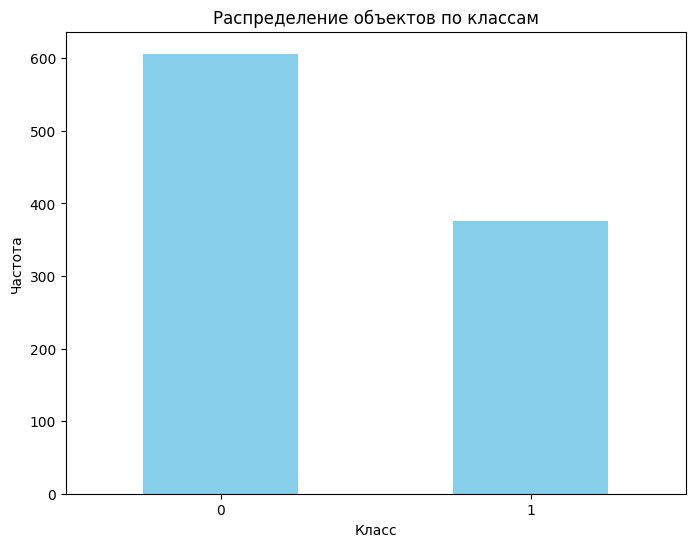

In [379]:
# < ENTER YOUR CODE HERE >
# Строим гистограмму распределения объектов по классам
plt.figure(figsize=(8, 6))
data['survived'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение объектов по классам')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.show()

In [380]:
class_1 = (data['survived'] == 1).mean()

print("Доля объектов, принадлежащих к классу 1:", class_1.round(3))

Доля объектов, принадлежащих к классу 1: 0.382


Определите долю пропущенных значений в рамках каждого признака и избавьтесь от тех признаков, где доля пропусков больше трети. Также удалите колонку <code>ticket</code>, вряд ли эта информация будет полезной.

In [381]:
# < ENTER YOUR CODE HERE >
# Вычислим долю пропущенных значений для каждого признака

missing_values = data.isnull().mean() #найдем
missing_values

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.202854
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.783894
embarked     0.000000
home.dest    0.422018
dtype: float64

In [382]:
# Вычислим долю пропущенных значений для каждого признак

# Определим признаки, у которых доля пропусков больше трети
threshold = 1/3
columns_to_drop = missing_values[missing_values > threshold].index

# Удалим указанные признаки и столбец "ticket"
data.drop(columns=columns_to_drop, inplace=True)
data.drop(columns = ['ticket'], inplace=True)

In [346]:
data

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,C
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,S
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,S
...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,8.0500,S
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,8.0500,S
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,13.0000,S
979,3,0,"Barton, Mr. David John",male,22.0,0,0,8.0500,S


Из описания набора данных видно, что колонки <code>sibsp</code> и <code>parch</code> по сути отвечают за размер семьи. Замените эти две колонки на колонку <code>fam_size</code>, значения которой будут вычисляться как сумма соответствующих значений в колонках <code>sibsp</code> и <code>parch</code>.

In [347]:
# < ENTER YOUR CODE HERE >


In [348]:
# Создадим новый столбец fam_size, который будет содержать сумму значений из столбцов sibsp и parch
data['fam_size'] = data['sibsp'] + data['parch'] #просто называет столбец и присваиваем ему значения

# Удалим столбцы sibsp и parch
data.drop(columns=['sibsp', 'parch'], inplace=True)
data_initial = data   #оставим требуемый исходный набор данный
data

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [349]:
data_initial

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


Полученный датасет будем называть **исходным** (выброшенные на этом этапе признаки не нужно возвращать ни на одном из последующих этапов выполнения задания). Вычислите полученное число предикторов.

In [350]:
# < ENTER YOUR CODE HERE >
num_of_predictors = data.select_dtypes(include=['int64', 'float64', 'object']).columns
num_of_predictors

Index(['pclass', 'survived', 'name', 'sex', 'age', 'fare', 'embarked',
       'fam_size'],
      dtype='object')

In [351]:
data['fam_size'].mean().round(3) #выборочное среднее колонки

0.866

На основе имеющейся статистики оцените вероятность выжить если пассажир -- представитель определенной категории (указана в вашем индивидуальном задании)

In [352]:
# < ENTER YOUR CODE HERE >
# Выберем только пассажиров мужского пола во втором классе
male_passengers_2nd_class = data[(data['sex'] == 'male') & (data['pclass'] == 2)]

# Посчитаем количество пассажиров этой категории и количество выживших
total_passengers = len(male_passengers_2nd_class)
survived_passengers = male_passengers_2nd_class['survived'].sum()

# Оценим вероятность выживания
survival_probability = survived_passengers / total_passengers

print("Вероятность выживания для пассажиров мужского пола во втором классе:", survival_probability.round(3))

Вероятность выживания для пассажиров мужского пола во втором классе: 0.155


Постройте гистограммы выжиших и невыживших по возрастам.

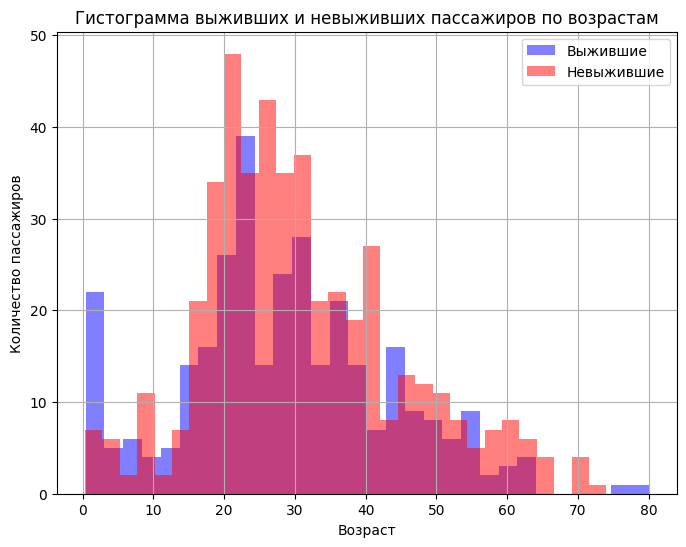

In [353]:
# < ENTER YOUR CODE HERE >
survived = data[data['survived'] == 1]
not_survived = data[data['survived'] == 0]

# Построим гистограммы выживших и невыживших пассажиров по возрастам
plt.figure(figsize=(8, 6))
plt.hist(survived['age'].dropna(), bins=30, alpha=0.5, color='blue', label='Выжившие')
plt.hist(not_survived['age'].dropna(), bins=30, alpha=0.5, color='red', label='Невыжившие')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма выживших и невыживших пассажиров по возрастам')
plt.legend()
plt.grid(True)
plt.show()

# Модель на основе числовых признаков

## Удаление строк с пропусками

В качестве базовой модели имеет смысл построить модель с минимальными трудозатратами.

Из исходного датасета удалите все категориальные признаки, а также строки, содержащие пропуски.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки<b> с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>survived</code>.

Обучите модель <code>LogisticRegression()</code> <b>с параметрами, указанными в вашем задании</b>, на тренировочных данных, оцените на тестовых.

Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.



In [354]:
# < ENTER YOUR CODE HERE >

In [355]:
#удалим категориальные признаки
data.drop(['name', 'sex', 'embarked'], axis=1, inplace=True)
data

,pclass,survived,age,fare,fam_size
0,3,1,NaN,7.7333,0
1,3,1,NaN,7.7500,0
2,3,1,38.0,7.2292,0
3,3,0,22.0,7.8958,0
4,3,0,16.0,9.5000,0
...,...,...,...,...,...
976,3,1,NaN,8.0500,0
977,3,1,19.0,8.0500,0
978,2,0,34.0,13.0000,0
979,3,0,22.0,8.0500,0


In [356]:
#удалим пропуски
data = data.dropna()
data

,pclass,survived,age,fare,fam_size
2,3,1,38.0,7.2292,0
3,3,0,22.0,7.8958,0
4,3,0,16.0,9.5000,0
5,3,1,29.0,7.7500,0
7,1,0,25.0,26.0000,0
...,...,...,...,...,...
975,2,0,19.0,10.5000,0
977,3,1,19.0,8.0500,0
978,2,0,34.0,13.0000,0
979,3,0,22.0,8.0500,0


In [357]:
#разобъем датасет на отклики и предикторы
X = data.drop(['survived'], axis=1)
y = data['survived']



In [358]:
#разобъем на трейн и тест-выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

In [359]:
#инициализируем модель
model = LogisticRegression(max_iter=1000, random_state = 23)

In [360]:
#обучим модель
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=23)

In [361]:
#предсказание на тестовых данных
y_pred = model.predict(X_test)

In [362]:
###оценка модели
f1 = f1_score(y_test, y_pred)

print("F1 score на тестовых данных:", f1.round(3))

F1 score на тестовых данных: 0.48


## Заполнение пропусков средним

Качество полученной модели оставляет желать лучшего. Имеет смысл попробовать заполнить пропуски. Из исходного набора данных удалите категориальные признаки, а пропуски заполните средним по столбцу. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [363]:
# < ENTER YOUR CODE HERE >
data = data_initial
data.head(10)

,pclass,survived,age,fare,fam_size
0,3,1,NaN,7.7333,0
1,3,1,NaN,7.7500,0
2,3,1,38.0,7.2292,0
3,3,0,22.0,7.8958,0
4,3,0,16.0,9.5000,0
5,3,1,29.0,7.7500,0
6,3,0,NaN,7.2500,0
7,1,0,25.0,26.0000,0
8,3,0,27.0,7.8958,0
9,3,0,13.0,31.3875,6


In [364]:
# Заполнение пропущенных значений средним по столбцу
data.fillna(data.mean(), inplace=True)

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['survived'])
y = data['survived']

# Применение train_test_split с параметрами из задания и стратификацией по колонке survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

In [366]:
# Инициализация и обучение модели LogisticRegression с параметрами из задания
model = LogisticRegression(max_iter=1000, random_state=23)  # Увеличиваем число итераций для сходимости модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление f1_score
f1 = f1_score(y_test, y_pred)

print("F1 score на тестовых данных:", f1.round(3))

F1 score на тестовых данных: 0.488


## Заполнение пропусков на основе обращения


Очевидно, что заполнение пропусков в колонке <code>age</code> средним — не самая разумная идея. Возможно, стоит выполнить эту процедуру как-то более интеллектуально, например, с оглядкой на обращение к человеку.

Можно заметить, что исходный датасет в столбце <code>name</code> содержит информацию о социальном статусе пассажира, а именно присутсвуют обращения <code>Mr., Mrs., Dr.</code> и т.д. На основе этой информации можно попробовать сделать предположение о возрасте пассажира.

Верните в рассмотрение колонку <code>name</code>. Создайте отдельную колонку <code>honorific</code> и поместите туда значения обращений.

Вычислите число уникальных обращений.

In [383]:
####Мне надоело каждый раз перезапускать ноутбук, поэтому я еще раз создам исходный датасет
df = pd.read_csv('/content/titanic_train.csv')

# Вычислим долю пропущенных значений для каждого признака
missing_values = df.isnull().mean() #найдем
missing_values

# Определим признаки, у которых доля пропусков больше трети
threshold = 1/3
columns_to_drop = missing_values[missing_values > threshold].index

# Удалим указанные признаки и столбец "ticket"
df.drop(columns=columns_to_drop, inplace=True)
df.drop(columns = ['ticket'], inplace=True)

# Создадим новый столбец fam_size, который будет содержать сумму значений из столбцов sibsp и parch
df['fam_size'] = df['sibsp'] + df['parch'] #просто называет столбец и присваиваем ему значения

# Удалим столбцы sibsp и parch
df.drop(columns=['sibsp', 'parch'], inplace=True)

df.head()

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0


In [384]:
df.drop(['sex', 'embarked'], axis=1, inplace=True)
df.head()

,pclass,survived,name,age,fare,fam_size
0,3,1,"Smyth, Miss. Julia",NaN,7.7333,0
1,3,1,"Glynn, Miss. Mary Agatha",NaN,7.7500,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",38.0,7.2292,0
3,3,0,"Vovk, Mr. Janko",22.0,7.8958,0
4,3,0,"de Pelsmaeker, Mr. Alfons",16.0,9.5000,0


In [385]:
# < ENTER YOUR CODE HERE >
# Извлечение обращений из столбца 'name' с помощью регулярного выражения
df['honorific'] = df['name'].str.extract(r'([A-Za-z]+)\.')

# Вычисление числа уникальных обращений
unique_honorifics = df['honorific'].nunique()

print("Число уникальных обращений:", unique_honorifics)

Число уникальных обращений: 14


Скорее всего имеет смысл сократить число обращений, добавив малочисленные группы к более многочисленным, так как принципиальной разницы между, например, <code>Don</code> и <code>Mr</code>, видимо, нет. Отметим, что <code>Master</code> — это прежнее обращение к ребенку, с этим обращением будем работать отдельно.




Выполните следующие замены:

<code>Mr</code> $\leftarrow$ <code>['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt']</code>

<code>Mrs</code> $\leftarrow$ <code> ['Dona', 'Countess']</code>

<code>Miss</code> $\leftarrow$ <code> ['Mlle', 'Ms']</code>

In [403]:
# < ENTER YOUR CODE HERE >
####Мне надоело каждый раз перезапускать ноутбук, поэтому я еще раз создам исходный датасет
df = pd.read_csv('/content/titanic_train.csv')

# Вычислим долю пропущенных значений для каждого признака
missing_values = df.isnull().mean() #найдем
missing_values

# Определим признаки, у которых доля пропусков больше трети
threshold = 1/3
columns_to_drop = missing_values[missing_values > threshold].index

# Удалим указанные признаки и столбец "ticket"
df.drop(columns=columns_to_drop, inplace=True)
df.drop(columns = ['ticket'], inplace=True)

# Создадим новый столбец fam_size, который будет содержать сумму значений из столбцов sibsp и parch
df['fam_size'] = df['sibsp'] + df['parch'] #просто называет столбец и присваиваем ему значения

# Удалим столбцы sibsp и parch
df.drop(columns=['sibsp', 'parch'], inplace=True)

df.head()


,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0


In [404]:
df.drop(['embarked'], axis=1, inplace=True)
df.head()

,pclass,survived,name,sex,age,fare,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,0


In [405]:
# Извлечение обращений из столбца 'name' с помощью регулярного выражения
df['honorific'] = df['name'].str.extract(r'([A-Za-z]+)\.')

# Вычисление числа уникальных обращений
unique_honorifics = df['honorific'].nunique()

print("Число уникальных обращений:", unique_honorifics)

Число уникальных обращений: 14


Вычислите долю строк со значением <code>Master</code> относительно числа всех мужчин

In [ ]:
# < ENTER YOUR CODE HERE >

In [406]:
# Словарь для замен обращений
replace_dict = {
    'Mr': ['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt'],
    'Mrs': ['Dona', 'Countess'],
    'Miss': ['Mlle', 'Ms']
}

#замена обращений согласно указанным условиям
for new_title, old_titles in replace_dict.items():
    df['honorific'] = df['honorific'].replace(old_titles, new_title)

# Вычисление доли строк со значением 'Master' относительно всех строк с обращением 'Mr'
total_male_rows = df[df['sex'] == 'male'].shape[0]
master_rows = df[(df['honorific'] == 'Master') & (df['sex'] == 'male')].shape[0]
master_fraction = master_rows / total_male_rows

print("Доля строк со значением 'Master' относительно всех мужчин:", master_fraction)

Доля строк со значением 'Master' относительно всех мужчин: 0.07232704402515723


Вычислите средний возраст категории, указанной в вашем индивидуальном задании

In [407]:
# < ENTER YOUR CODE HERE >
#Mrs
#отфильтровать строки с обращением 'Mrs' и вычислить средний возраст
avg_age_mrs = df[df['honorific'] == 'Mrs']['age'].mean()

print("Средний возраст категории 'Mrs':", avg_age_mrs)


Средний возраст категории 'Mrs': 36.98425196850393


Заполните пропуски в колонке <code>age</code> средним, соответствующим среднему категории <code>honorific</code>.

Избавьтесь от нечисловых признаков. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [408]:
df

,pclass,survived,name,sex,age,fare,fam_size,honorific
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,0,Miss
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,0,Miss
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,0,Mrs
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,0,Mr
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,0,Mr
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,0,Miss
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,0,Mr
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,0,Mr
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,0,Mr


In [409]:
# < ENTER YOUR CODE HERE >
# Вычисление среднего возраста для каждой категории 'honorific'
mean_age_by_honorific = df.groupby('honorific')['age'].mean()

# Заполнение пропущенных значений в колонке 'age' средними значениями для каждой категории 'honorific'
for honorific, mean_age in mean_age_by_honorific.items():
    df.loc[(df['age'].isnull()) & (df['honorific'] == honorific), 'age'] = mean_age

# Удаление нечисловых признаков
df = df.drop(['name', 'sex', 'honorific'], axis=1)





In [410]:
# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['survived'], axis=1)
y = df['survived']

# Применение train_test_split с параметрами из задания и стратификацией по колонке survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

# Инициализация и обучение модели LogisticRegression с параметрами из задания
model = LogisticRegression(max_iter=1000, random_state=42)  # Увеличиваем число итераций для сходимости модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление f1_score
f1 = f1_score(y_test, y_pred)

print("F1 score на тестовых данных:", f1)

F1 score на тестовых данных: 0.484375


# Модель с использование категориальных признаков

В исходном наборе данных заполните пропуски колонки <code>age</code> значениями на основе обращений (как в предыдущем пункте).

Не используйте признаки <code>name</code> и <code>honorific</code>. Они свою функцию выполнили.

Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>. Далее по знакомой схеме: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [436]:
# < ENTER YOUR CODE HERE >
####Мне надоело каждый раз перезапускать ноутбук, поэтому я еще раз создам исходный датасет
df = pd.read_csv('/content/titanic_train.csv')

# Вычислим долю пропущенных значений для каждого признака
missing_values = df.isnull().mean() #найдем
missing_values

# Определим признаки, у которых доля пропусков больше трети
threshold = 1/3
columns_to_drop = missing_values[missing_values > threshold].index

# Удалим указанные признаки и столбец "ticket"
df.drop(columns=columns_to_drop, inplace=True)
df.drop(columns = ['ticket'], inplace=True)

# Создадим новый столбец fam_size, который будет содержать сумму значений из столбцов sibsp и parch
df['fam_size'] = df['sibsp'] + df['parch'] #просто называет столбец и присваиваем ему значения

# Удалим столбцы sibsp и parch
df.drop(columns=['sibsp', 'parch'], inplace=True)
df.head()

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0


In [437]:
#df.drop(['embarked'], axis=1, inplace=True)



In [438]:
# Извлечение обращений из столбца 'name' с помощью регулярного выражения
df['honorific'] = df['name'].str.extract(r'([A-Za-z]+)\.')

# Вычисление числа уникальных обращений
unique_honorifics = df['honorific'].nunique()

#print("Число уникальных обращений:", unique_honorifics)

In [440]:
# Словарь для замен обращений
replace_dict = {
    'Mr': ['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt'],
    'Mrs': ['Dona', 'Countess'],
    'Miss': ['Mlle', 'Ms']
}

#замена обращений согласно указанным условиям
for new_title, old_titles in replace_dict.items():
    df['honorific'] = df['honorific'].replace(old_titles, new_title)

# Вычисление доли строк со значением 'Master' относительно всех строк с обращением 'Mr'
#total_male_rows = df[df['sex'] == 'male'].shape[0]
#master_rows = df[(df['honorific'] == 'Master') & (df['sex'] == 'male')].shape[0]
#master_fraction = master_rows / total_male_rows

#print("Доля строк со значением 'Master' относительно всех мужчин:", master_fraction)

In [441]:
# Вычисление среднего возраста для каждой категории 'honorific'
mean_age_by_honorific = df.groupby('honorific')['age'].mean()

# Заполнение пропущенных значений в колонке 'age' средними значениями для каждой категории 'honorific'
for honorific, mean_age in mean_age_by_honorific.items():
    df.loc[(df['age'].isnull()) & (df['honorific'] == honorific), 'age'] = mean_age

# Удаление нечисловых признаков name и honorific
df = df.drop(['name', 'honorific'], axis=1)

In [442]:
df.head()

,pclass,survived,sex,age,fare,embarked,fam_size
0,3,1,female,22.005765,7.7333,Q,0
1,3,1,female,22.005765,7.7500,Q,0
2,3,1,female,38.000000,7.2292,C,0
3,3,0,male,22.000000,7.8958,S,0
4,3,0,male,16.000000,9.5000,S,0


In [443]:
# Применение one-hot кодирования для нечисловых признаков
df = pd.get_dummies(df, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['survived'])
y = df['survived']

# Применение train_test_split с параметрами из задания и стратификацией по колонке survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

# Инициализация и обучение модели LogisticRegression с параметрами из задания
model = LogisticRegression(max_iter=1000, random_state=23)  # Увеличиваем число итераций для сходимости модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление f1_score
f1 = f1_score(y_test, y_pred)

print("F1 score на тестовых данных:", f1)

F1 score на тестовых данных: 0.6814814814814815
